In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("latimes-county-totals.csv") 
print (df.head(5))
df.describe()

      date   county  fips  confirmed_cases  deaths  new_confirmed_cases  \
0  1/26/20  Alameda     1                0       0                  NaN   
1  1/31/20  Alameda     1                0       0                  0.0   
2   2/2/20  Alameda     1                0       0                  0.0   
3  2/20/20  Alameda     1                0       0                  0.0   
4  2/21/20  Alameda     1                0       0                  0.0   

   new_deaths  
0         NaN  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
count,3152.000000,3152.000000,3152.000000,3094.000000,3094.000000
mean,59.317259,363.570749,12.735723,18.138009,0.739173
std,32.983935,1646.535743,73.904282,82.994716,4.295296
min,1.000000,0.000000,0.000000,-2.000000,0.000000
25%,29.000000,3.000000,0.000000,0.000000,0.000000
50%,63.000000,20.000000,0.000000,1.000000,0.000000
75%,85.000000,155.000000,3.000000,9.000000,0.000000
max,115.000000,26238.000000,1260.000000,1505.000000,76.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 7 columns):
date                   3152 non-null object
county                 3152 non-null object
fips                   3152 non-null int64
confirmed_cases        3152 non-null int64
deaths                 3152 non-null int64
new_confirmed_cases    3094 non-null float64
new_deaths             3094 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 172.5+ KB


In [4]:
def SEIRD_model(N, E, I, r, r2, re, r2e, p, d, shelter_in_place, b, b2, y, a, days):
    '''
    N - Total population，N = I + S + R + E 
    S - Number of people that are Susceptibles
    R - Number of people that are Recovered
    E - Number of people that are Exposed
    I - Number of people that are Infected
    r - The number of people each infected contacts each day
    re - New r after shelter in place
    r2 - The number of people each asymptomatic contacts each day
    r2e - New r2 after shelter in place takes effect
    p - Protection rate of the masks. After shelter in place, b=b*p, b2 = b2*p
    d - The proportion of infected who die each day to the total number of infected people
    shelter_in_place - Days since shelter in place
    b - Probability of transmission from infected to susceptible person
    b2 Probability of transmission from asymptomatic to susceptible
    y - The proportion of infected who are recovered each day to the total number of infected people
    a - Probability of susceptible transforming to infected
    days - Duration in days
    '''
    S = N - I - E
    I_list = [I]
    S_list = [S]
    E_list = [E]
    R_list = [0]
    D_list = [0]
    C_list = [0] # Confirmed list 

    for i in range(1, days):
        if (i + 1) == shelter_in_place:
            r, r2, b, b2,a = re, r2e, b * p, b2 * p, a*p
        E_perday = r * b * I_list[i - 1] * S_list[i - 1]/N
        E_perday_for_E = r2 * b2 * E_list[i - 1] * S_list[i - 1]/N
        I_perday = a * E_list[i - 1]
        R_perday = y * I_list[i - 1]
        D_perday = d * I_list[i - 1]
        C_list.append(C_list[i - 1] + I_perday)
        I_list.append(I_list[i - 1] + I_perday - R_perday - D_perday)
        S_list.append(S_list[i - 1] - E_perday - E_perday_for_E)
        R_list.append(R_list[i - 1] + R_perday)
        D_list.append(D_list[i - 1] + D_perday)
        E_list.append(E_list[i - 1] + E_perday + E_perday_for_E - I_perday)
    newlist = [I_list,S_list,E_list,R_list,D_list,C_list,days]
    return newlist

In [5]:
N = 10000
E = 0
I = 1
r = 20
r2 = 20
re = 5
r2e = 5
p = 0.8
d = 0.01
shelter_in_place = 10
b = 0.03
b2 = 0.03
y = 0.1
a = 0.1
days =140
result = SEIRD_model(N, E, I, r, r2, re, r2e, p, d, shelter_in_place, b, b2, y, a, days)

In [6]:
print(result[6])

140


In [7]:
day_cul = list(range(1,result[6]+1))

Text(0, 0.5, 'Number of individuals')

<Figure size 432x288 with 0 Axes>

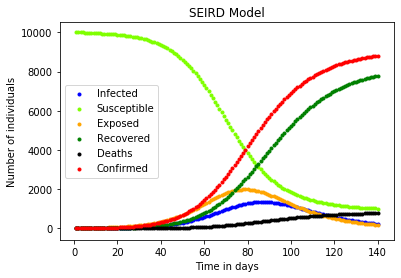

In [8]:
plt.clf()
fit = plt.figure()
# plot x = days, y = I_lisst
plt.scatter(x=day_cul , y = result[0], marker = '.', color = 'blue', label = 'Infected')

#plot x = days, y = S_list
plt.scatter(x=day_cul , y = result[1], marker = '.', color = 'chartreuse',label = 'Susceptible' )

#plot x = days, y = E_list
plt.scatter(x=day_cul , y = result[2], marker = '.', color = 'orange',label = 'Exposed' )

#plot x = days, y = R_list
plt.scatter(x=day_cul , y = result[3], marker = '.', color = 'green',label = 'Recovered' )

#plot x = days, y = D_list
plt.scatter(x=day_cul , y = result[4], marker = '.', color = 'black',label = 'Deaths' )

#plot x = days, y = C_list
plt.scatter(x=day_cul , y = result[5], marker = '.', color = 'red',label = 'Confirmed' )

plt.title("SEIRD Model")
plt.xlabel("Time in days")
plt.legend(loc="best")
plt.ylabel("Number of individuals")

In [9]:
#LA county population: 10.04 million (2019)
#We will use the population from last year for this model
#100 days model
#LA had its first confirmed case on 2020-01-26
#Started shelter in place around 2020-03-20
#shelter in place: the day that shelter in place enforce: 54 days

N = 10400000
E = 0
I = 1
r = 8
r2 = 8
re = 1
r2e = 1
p = 0.8
d = 0.01
shelter_in_place = 54
b = 0.03
b2 = 0.03
y = 0.15
a = 0.1
days =100
result = SEIRD_model(N, E, I, r, r2, re, r2e, p, d, shelter_in_place, b, b2, y, a, days)

In [10]:
day_cul = list(range(1,result[6]+1))

Text(0, 0.5, 'Number of individuals')

<Figure size 432x288 with 0 Axes>

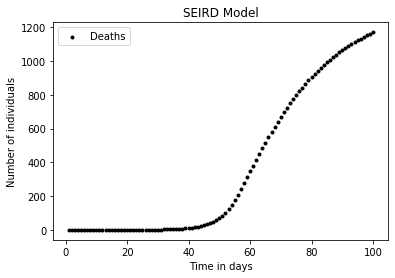

In [11]:
plt.clf()
fit = plt.figure()
# plot x = days, y = I_lisst
# plt.scatter(x=day_cul , y = result[0], marker = '.', color = 'blue', label = 'Infected')

#plot x = days, y = S_list
#plt.scatter(x=day_cul , y = result[1], marker = '.', color = 'chartreuse',label = 'Susceptible' )

#plot x = days, y = E_list
#plt.scatter(x=day_cul , y = result[2], marker = '.', color = 'orange',label = 'Exposed' )

#plot x = days, y = R_list
#plt.scatter(x=day_cul , y = result[3], marker = '.', color = 'green',label = 'Recovered' )

#plot x = days, y = D_list
plt.scatter(x=day_cul , y = result[4], marker = '.', color = 'black',label = 'Deaths' )

#plot x = days, y = C_list
#plt.scatter(x=day_cul , y = result[5], marker = '.', color = 'red',label = 'Confirmed' )

plt.title("SEIRD Model")
plt.xlabel("Time in days")
plt.legend(loc="best")
plt.ylabel("Number of individuals")